<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/MustafaDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.stats import f_oneway, chi2_contingency
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving By Mohd. Mustafa.csv to By Mohd. Mustafa.csv


In [166]:
mustafaDataset_Actual = pd.read_csv('By Mohd. Mustafa.csv')

In [167]:

mustafaDataset_Actual_Copy = mustafaDataset_Actual.copy()
print('Actual shape of dataset before any processing: ',mustafaDataset_Actual.shape)
actual_Rows = mustafaDataset_Actual_Copy.shape[0]
mustafaDataset_Actual_Copy = mustafaDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',mustafaDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = mustafaDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (100000, 9)
Shape of dataset after removing the duplicates:  (96146, 9)
No.of Duplicate rows in the Ishan Duttas Dataset =  3854


In [168]:
mustafaDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [169]:
mustafaDataset_Actual_Copy.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [170]:
mustafaDataset_Actual_Copy.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [171]:
mustafaDataset_Actual_Copy.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [172]:
mustafaDataset_Actual_Copy.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Distribution of target-feature 'diabetes'

Text(0.5, 1.0, 'Distribution of Diabetes in the dataset')

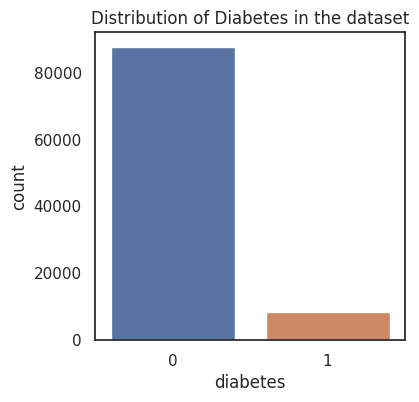

In [148]:
plt.figure(figsize=(4,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='diabetes')
plt.title('Distribution of Diabetes in the dataset')

# Relation(Visual) of Continuous variables ['age','bmi','HbA1c_level','blood_glucose_level']

Text(0.5, 1.0, 'Distribution of BMI in the dataset')

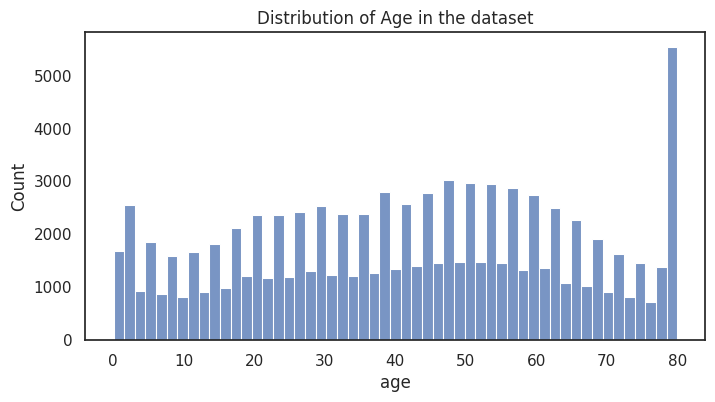

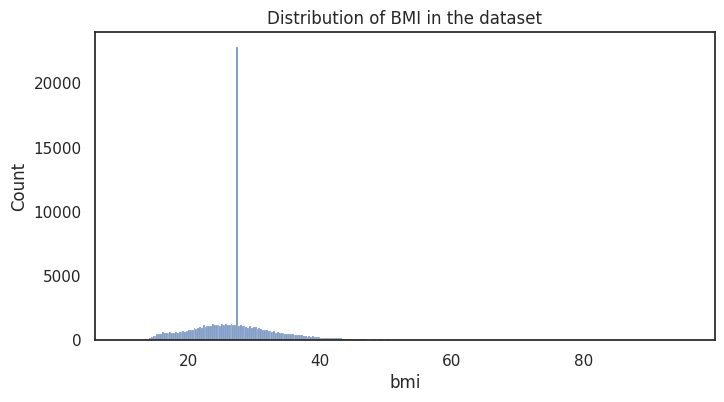

In [84]:
plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='age')
plt.title('Distribution of Age in the dataset')

plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='bmi')
plt.title('Distribution of BMI in the dataset')

Text(0.5, 1.0, 'Distribution of Age in the dataset')

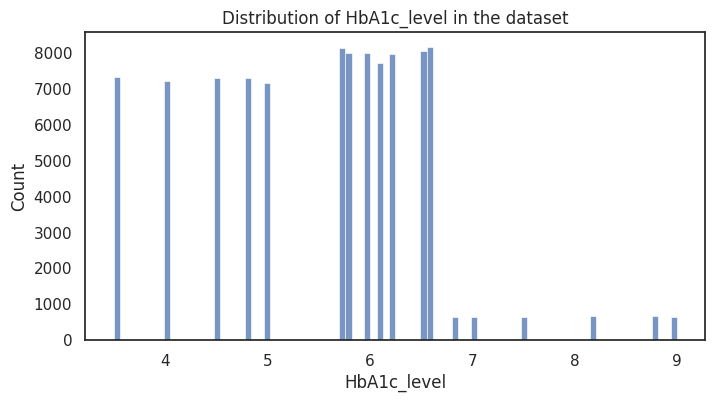

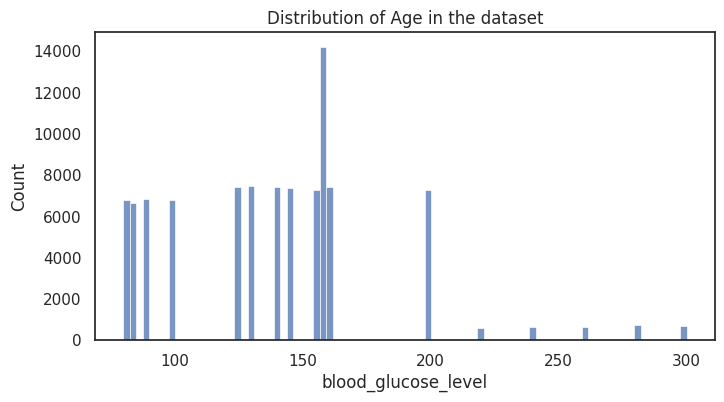

In [85]:
plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='HbA1c_level')
plt.title('Distribution of HbA1c_level in the dataset')

plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='blood_glucose_level')
plt.title('Distribution of Age in the dataset')

# Understanding how continuous varibles ['age','bmi','HbA1c_level','blood_glucose_level'] are influencing diabetes(Visual Analysis)

Text(0.5, 1.0, 'Scatter plot Age vs BMI')

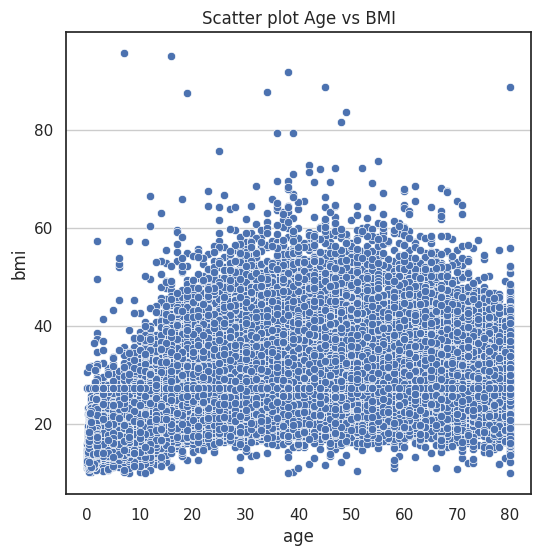

In [149]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=mustafaDataset_Actual_Copy, x='age',y='bmi',palette='rainbow').yaxis.grid(True)
plt.title('Scatter plot Age vs BMI')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t BMI')

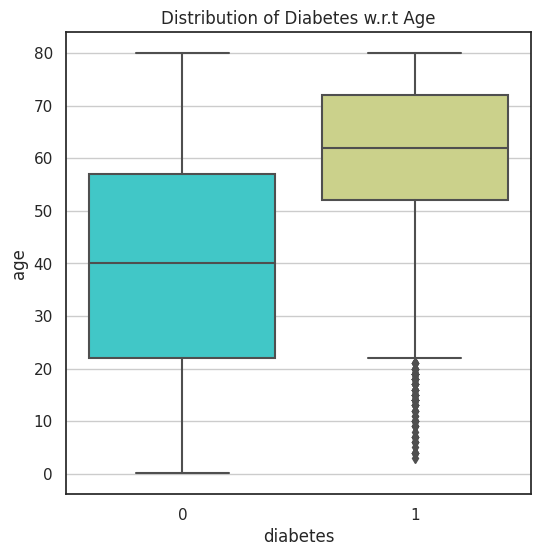

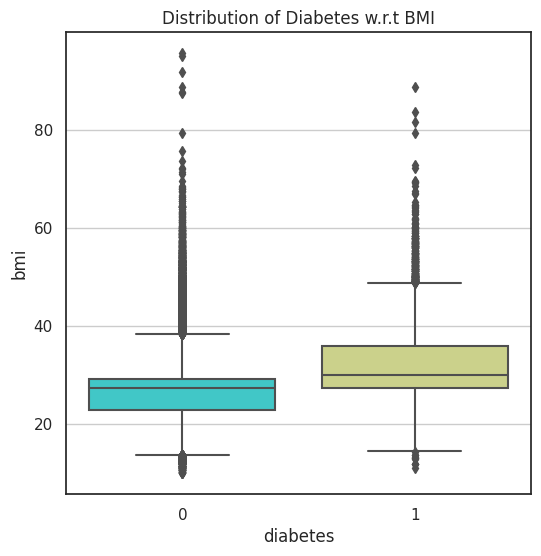

In [91]:
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age')

plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='bmi',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t BMI')

In [173]:
iqr = mustafaDataset_Actual_Copy['age'].quantile(0.75) - mustafaDataset_Actual_Copy['age'].quantile(0.25)

# Calculate the lower and upper bounds
lower_bound = mustafaDataset_Actual_Copy['age'].quantile(0.25) - (1.5 * iqr)
upper_bound = mustafaDataset_Actual_Copy['age'].quantile(0.75) + (1.5 * iqr)

# Drop the outliers
mustafaDataset_Actual_Copy = mustafaDataset_Actual_Copy[(mustafaDataset_Actual_Copy['age'] > lower_bound) & (mustafaDataset_Actual_Copy['age'] < upper_bound)]

# Print the new dataset
print(mustafaDataset_Actual_Copy.shape)

(96146, 9)


Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Blood glucose level')

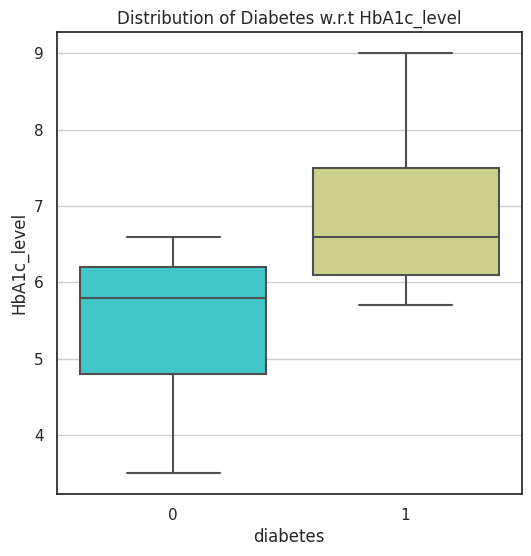

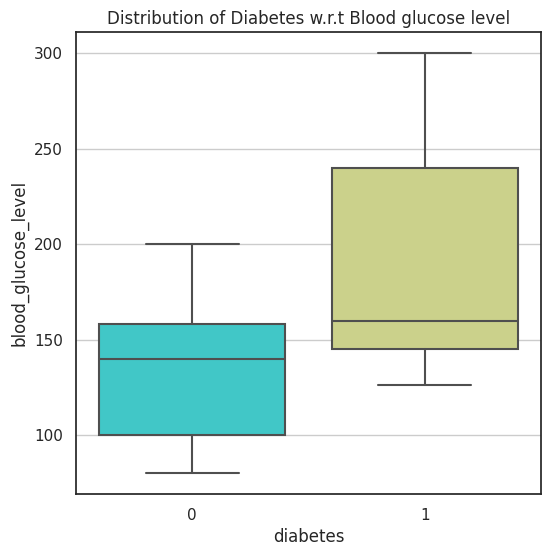

In [174]:
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='HbA1c_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t HbA1c_level')

plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='blood_glucose_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Blood glucose level')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & BMI')

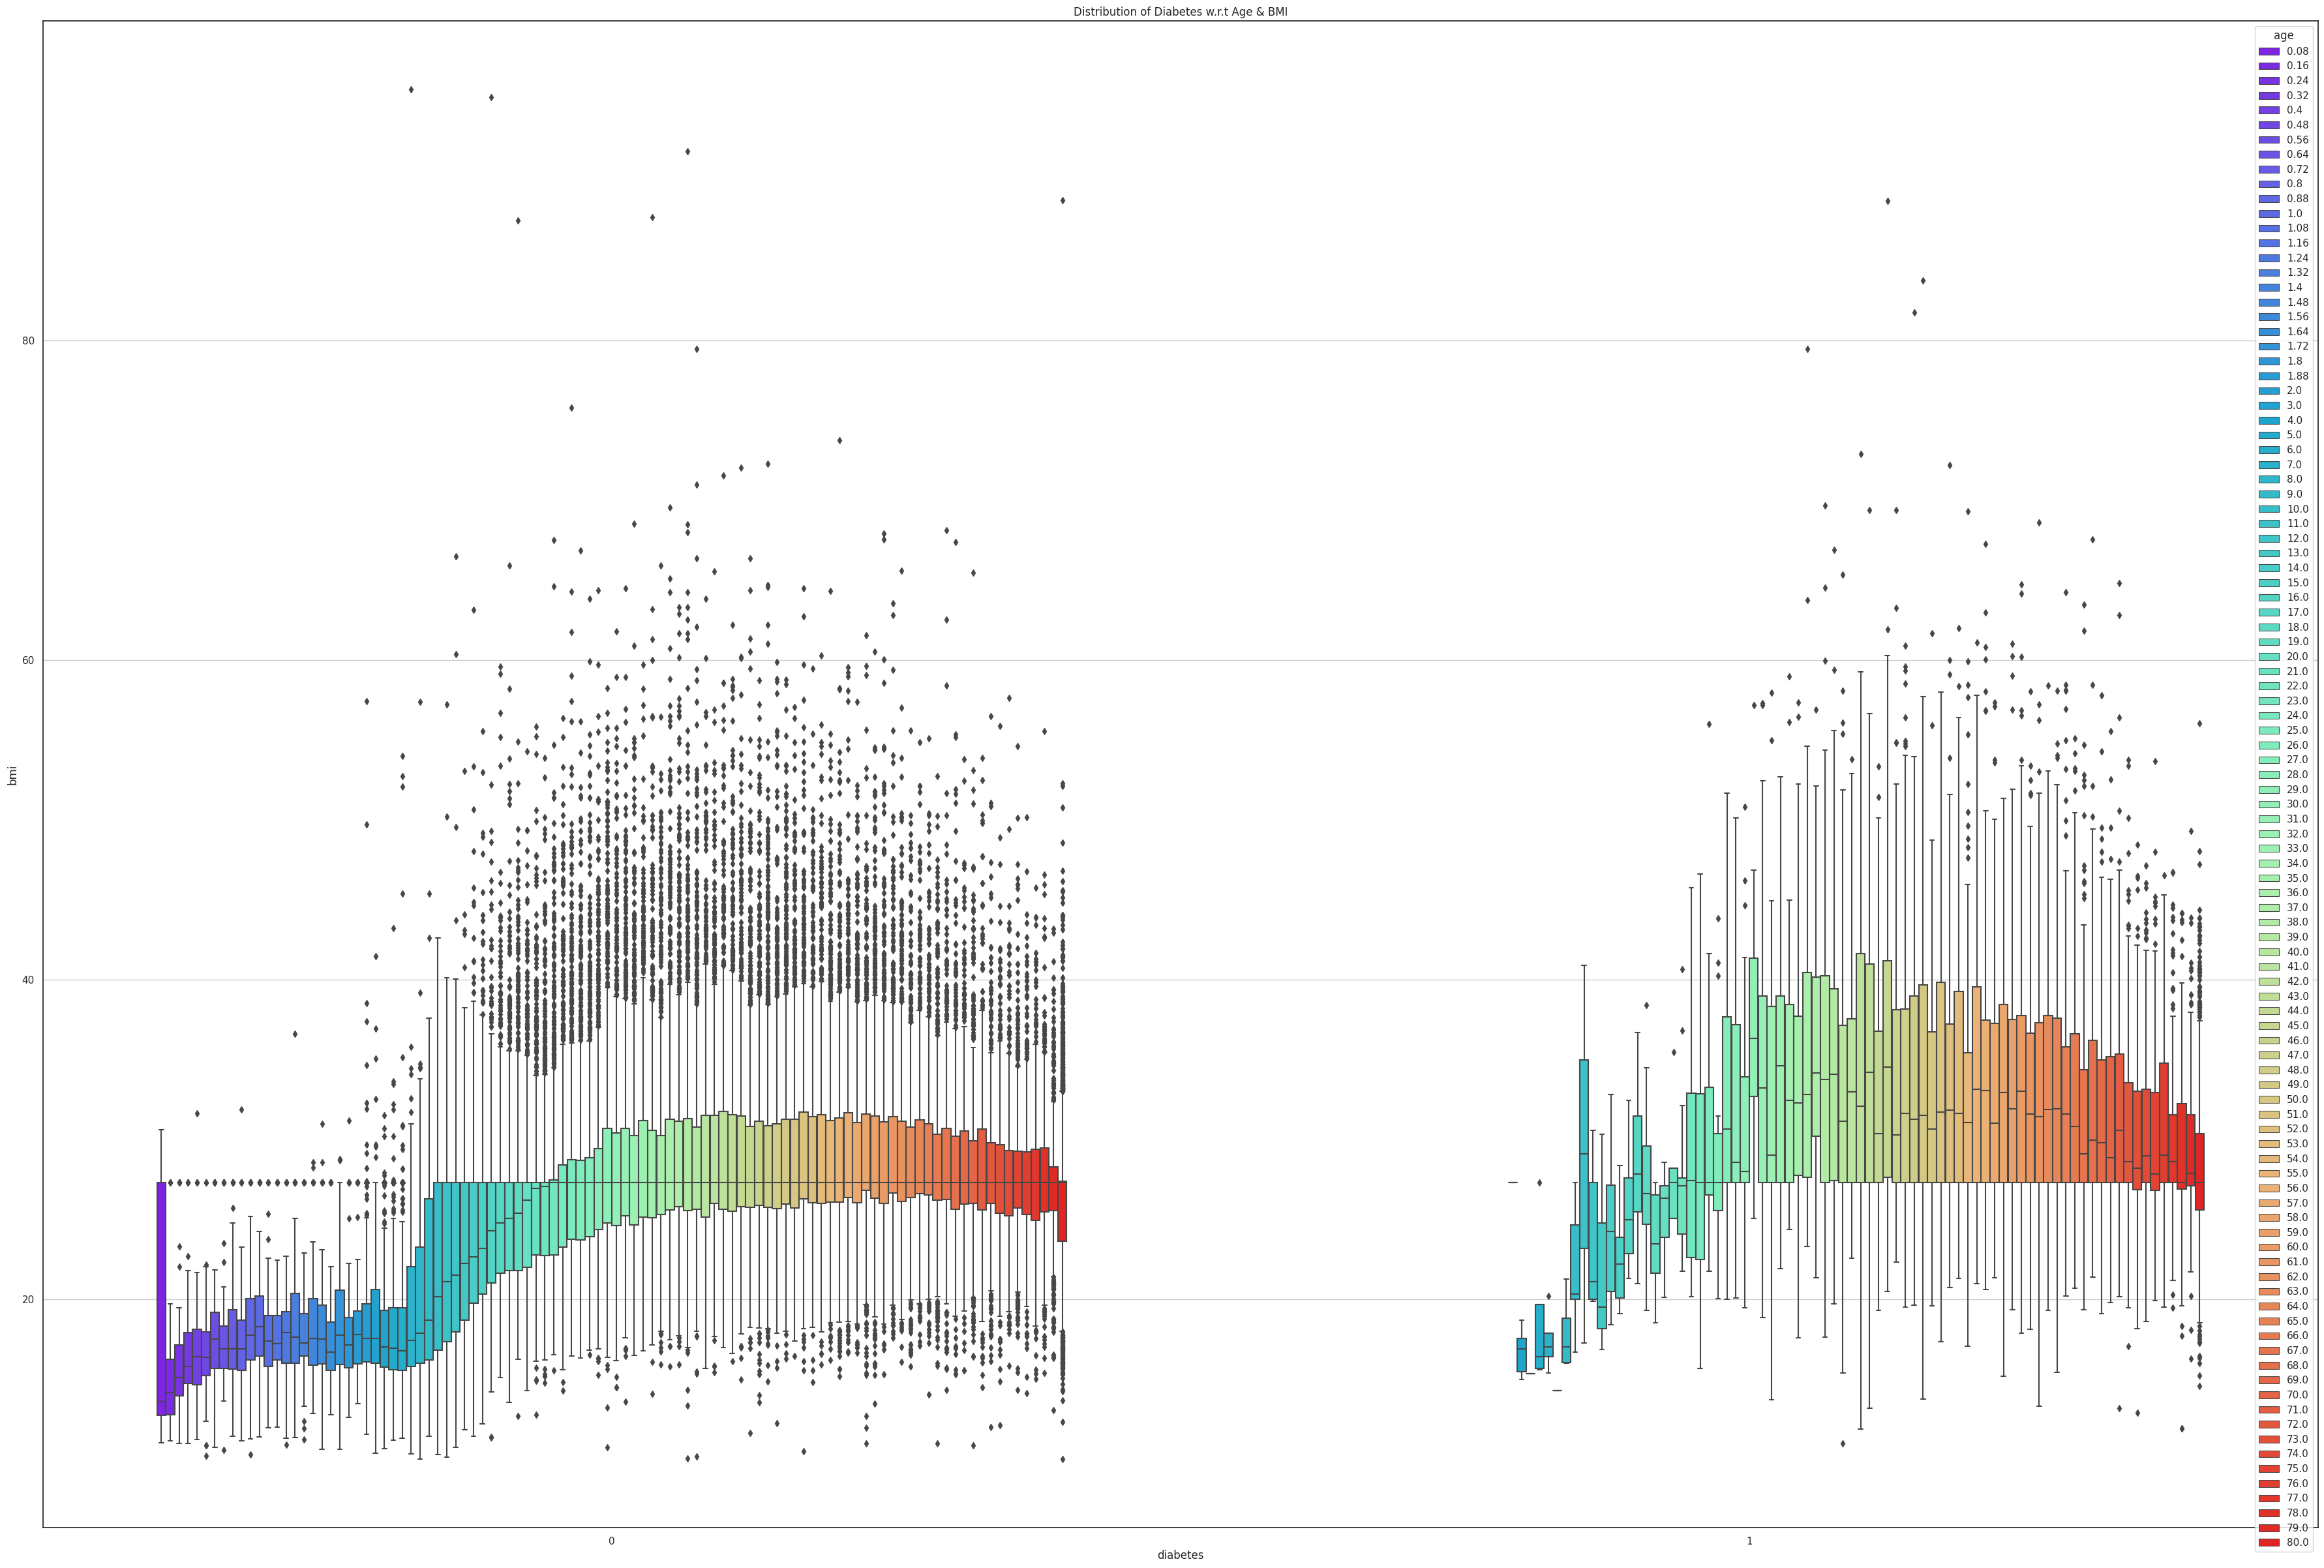

In [175]:
plt.figure(figsize=(45,30))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='bmi',hue='age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & BMI')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & HbA1c_level')

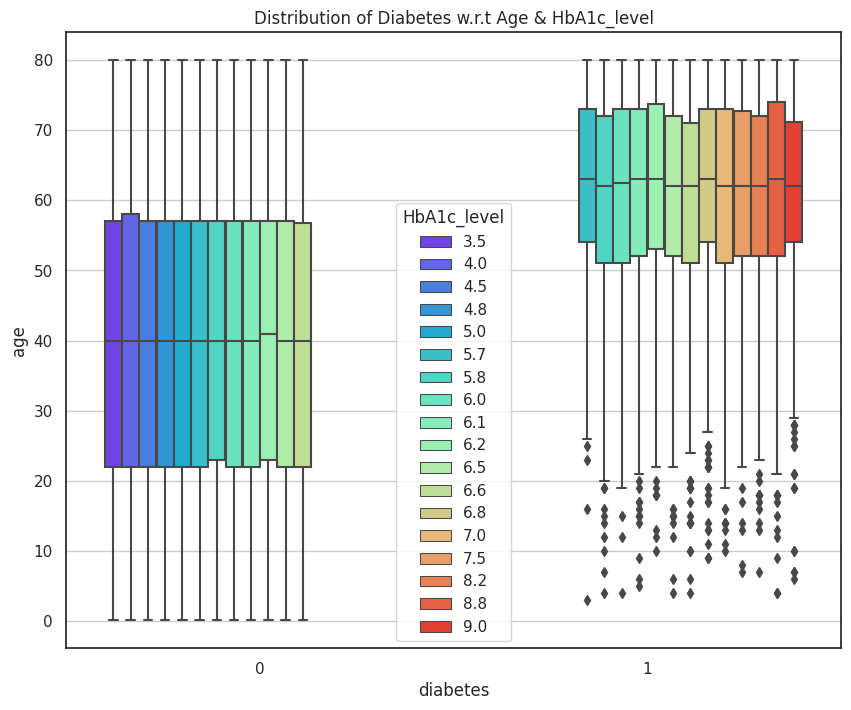

In [95]:
plt.figure(figsize=(10,8))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='age',hue='HbA1c_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & HbA1c_level')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & Blood glucose level')

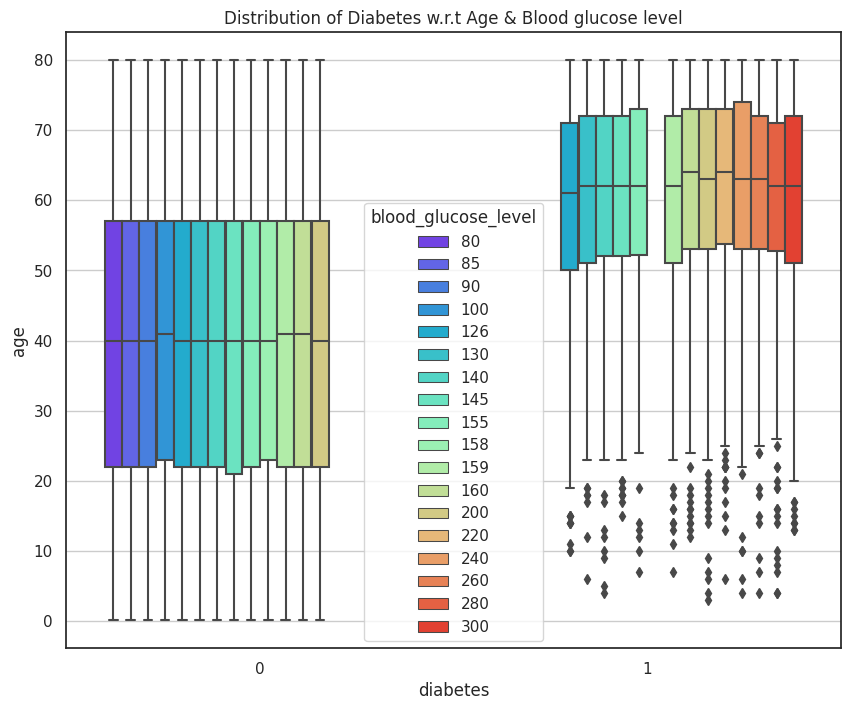

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='age',hue='blood_glucose_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & Blood glucose level')

(94115, 9)


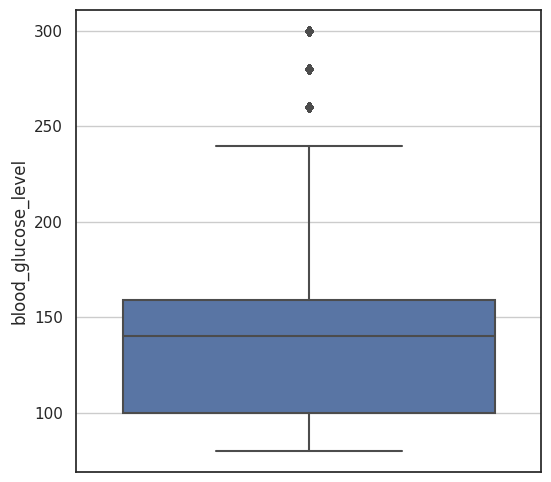

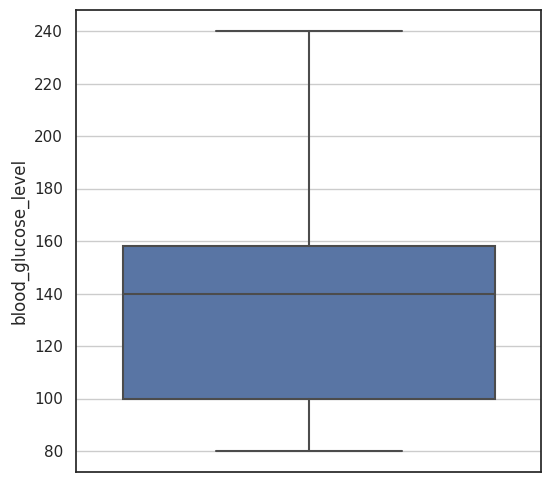

In [176]:
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy, y='blood_glucose_level').yaxis.grid(True)
iqr = mustafaDataset_Actual_Copy['blood_glucose_level'].quantile(0.75) - mustafaDataset_Actual_Copy['blood_glucose_level'].quantile(0.25)

# Calculate the lower and upper bounmustafaDataset_Actual_Copy
lower_bound = mustafaDataset_Actual_Copy['blood_glucose_level'].quantile(0.25) - (1.5 * iqr)
upper_bound = mustafaDataset_Actual_Copy['blood_glucose_level'].quantile(0.75) + (1.5 * iqr)

# Drop the outliers
mustafaDataset_Actual_Copy = mustafaDataset_Actual_Copy[(mustafaDataset_Actual_Copy['blood_glucose_level'] > lower_bound) & (mustafaDataset_Actual_Copy['blood_glucose_level'] < upper_bound)]

# Print the new dataset
print(mustafaDataset_Actual_Copy.shape)
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy, y='blood_glucose_level').yaxis.grid(True)

# Understanding the variation in target-feature diabetes w.r.t ['age','bmi','HbA1c_level','blood_glucose_level'] using ANOVA test(statistical test)

In [177]:
def FunctionAnova(inputData, targetFeature, predictorVariables):
  selectedPredictors = []
  for predictor in predictorVariables:
    categoryGroupLists = inputData.groupby(targetFeature)[predictor].apply(list)
    anovaResults = f_oneway(*categoryGroupLists)
    if(anovaResults[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
  return selectedPredictors

In [178]:
probablePredictorVariables = ['age','bmi','HbA1c_level','blood_glucose_level']
FunctionAnova(inputData=mustafaDataset_Actual_Copy, targetFeature='diabetes', predictorVariables=probablePredictorVariables)

age  is correlated with the target-variable  diabetes  with p-value:  0.0
bmi  is correlated with the target-variable  diabetes  with p-value:  0.0
HbA1c_level  is correlated with the target-variable  diabetes  with p-value:  0.0
blood_glucose_level  is correlated with the target-variable  diabetes  with p-value:  0.0


['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Relation(Visual) of Categorical variables ['hypertension','heart_disease','smoking_history','Gender']

Text(0.5, 1.0, 'Distribution of people suffering with heart disease in the dataset')

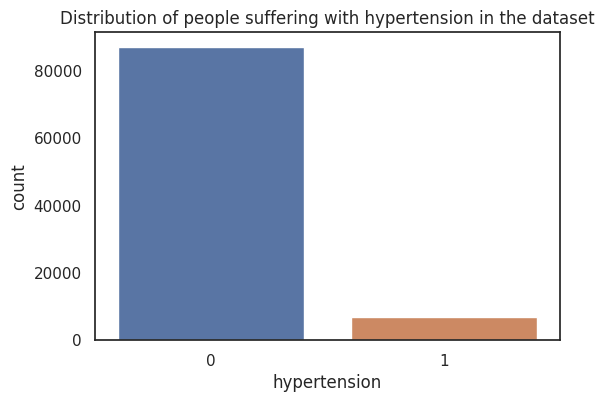

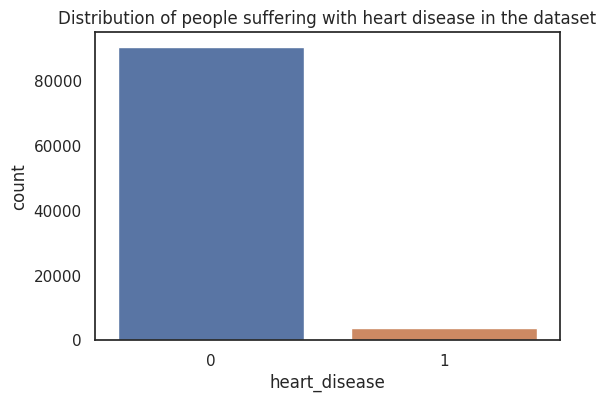

In [179]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='hypertension')
plt.title("Distribution of people suffering with hypertension in the dataset")

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='heart_disease')
plt.title("Distribution of people suffering with heart disease in the dataset")

Text(0.5, 1.0, 'Distribution of gender in the dataset')

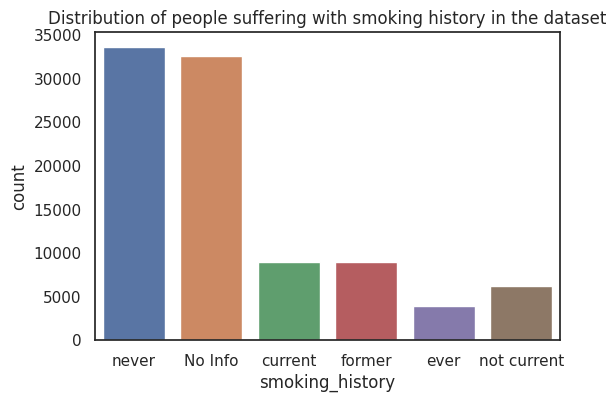

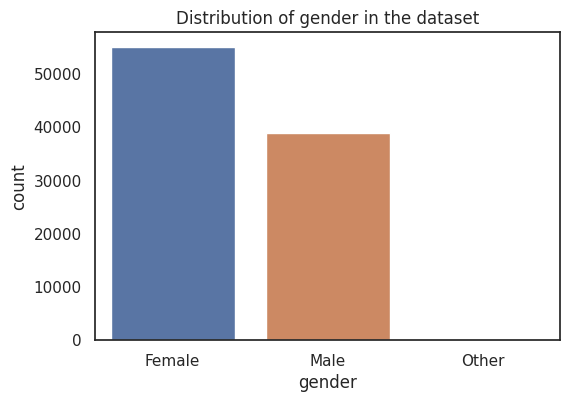

In [103]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='smoking_history')
plt.title("Distribution of people suffering with smoking history in the dataset")

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='gender')
plt.title("Distribution of gender in the dataset")

# Understanding how categorical variables ['hypertension','heart_disease','smoking_history','Gender'] are influencing diabetes(Visual analysis)

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people suffering with heart-disease')

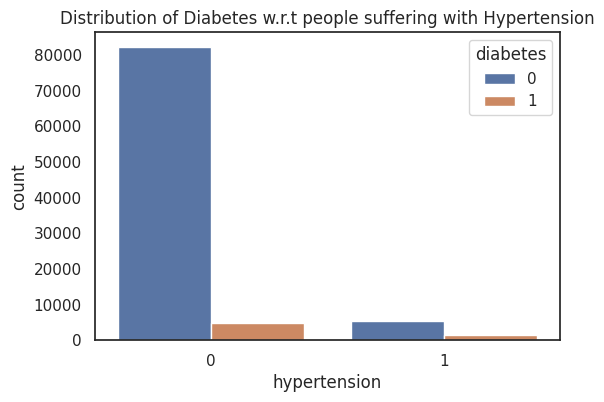

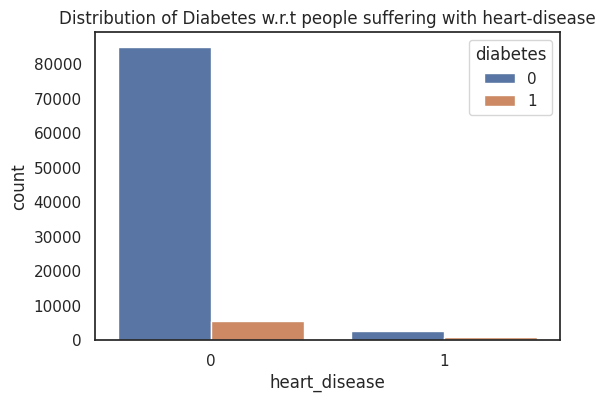

In [104]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='hypertension',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t people suffering with Hypertension')

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='heart_disease',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t people suffering with heart-disease')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Gender')

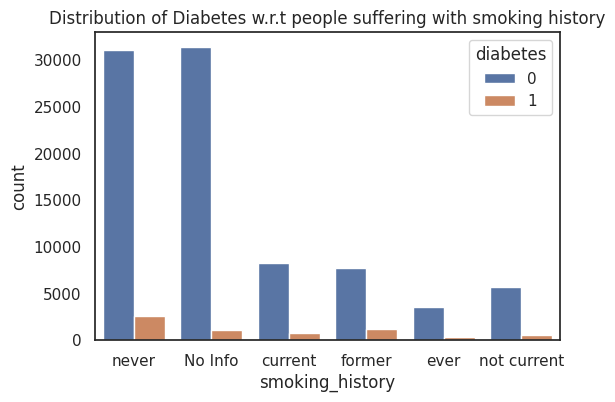

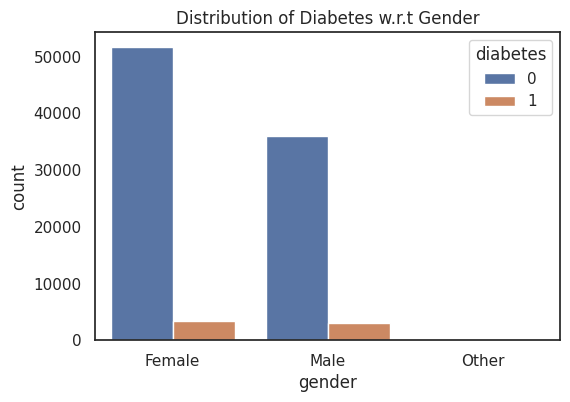

In [105]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='smoking_history',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t people suffering with smoking history')

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='gender',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t Gender')

In [180]:

def chiSquareTestFunction(inputData, targetFeature, predictorVariables):
  selectedPredictors=[]
  for predictor in predictorVariables:
    crossTableResults = pd.crosstab(index=inputData[targetFeature],columns=inputData[predictor])
    chisquareResult = chi2_contingency(crossTableResults)
    if(chisquareResult[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
  return selectedPredictors

In [181]:
probableCategoricalPredictorVariables = ['hypertension','heart_disease','smoking_history','gender']
chiSquareTestFunction(inputData=mustafaDataset_Actual_Copy, targetFeature='diabetes', predictorVariables=probableCategoricalPredictorVariables)

hypertension  is correlated with the target-variable  diabetes  with p-value:  0.0
heart_disease  is correlated with the target-variable  diabetes  with p-value:  0.0
smoking_history  is correlated with the target-variable  diabetes  with p-value:  0.0
gender  is correlated with the target-variable  diabetes  with p-value:  1.3177998761859885e-24


['hypertension', 'heart_disease', 'smoking_history', 'gender']

# All the features in the dataset are selected

In [182]:
def categorizeAge(age):
  if age>=18 and age<=24:
    return 1
  elif age>=25 and age<=29:
    return 2
  elif age>=30 and age<=34:
    return 3
  elif age>=35 and age<=39:
    return 4
  elif age>=40 and age<=44:
    return 5
  elif age>=45 and age<=49:
    return 6
  elif age>=50 and age<=54:
    return 7
  elif age>=55 and age<=59:
    return 8
  elif age>=60 and age<=64:
    return 9
  elif age>=65 and age<=69:
    return 10
  elif age>= 70 and age<=74:
    return 11
  elif age>=75 and age<=79:
    return 12
  elif age>=80:
    return 13
  else:
    return 0

In [183]:
mustafaDataset_Actual_Copy['age'] = mustafaDataset_Actual_Copy['age'].apply(categorizeAge)
mustafaDataset_Actual_Copy['gender'] = LabelEncoder().fit_transform(mustafaDataset_Actual_Copy.gender)
mustafaDataset_Actual_Copy.rename(columns = {'gender':'Gender','age':'Age','hypertension':'HighBP','smoking_history':'Smoker',
                                             'bmi':'BMI','diabetes': 'Diabetes','heart_disease':'HeartDisease','HbA1c_level':'HbA1cLevel',
                                             'blood_glucose_level': 'BloodGlucoseLevel'},inplace = True)
mustafaDataset_Actual_Copy.head(15)

,Gender,Age,HighBP,HeartDisease,Smoker,BMI,HbA1cLevel,BloodGlucoseLevel,Diabetes
0,0,13,0,1,never,25.19,6.6,140,0
1,0,7,0,0,No Info,27.32,6.6,80,0
2,1,2,0,0,never,27.32,5.7,158,0
3,0,4,0,0,current,23.45,5.0,155,0
4,1,12,1,1,current,20.14,4.8,155,0
5,0,1,0,0,never,27.32,6.6,85,0
6,0,5,0,0,never,19.31,6.5,200,1
7,0,12,0,0,No Info,23.86,5.7,85,0
8,1,5,0,0,never,33.64,4.8,145,0
9,0,3,0,0,never,27.32,5.0,100,0


In [184]:
selectedFeatures = ['Gender','Age','HighBP','BMI','Smoker','HeartDisease','HbA1cLevel','BloodGlucoseLevel','Diabetes']

In [185]:
dfCopy = mustafaDataset_Actual_Copy.copy()

mustafaDataset_Actual_Copy = mustafaDataset_Actual_Copy.drop(dfCopy[(dfCopy.Smoker != 'never') & (dfCopy.Smoker != 'current') & (dfCopy.Smoker != 'former')].index)
mustafaDataset_Actual_Copy['Smoker'] = LabelEncoder().fit_transform(mustafaDataset_Actual_Copy.Smoker)
mustafaDataset_Actual_Copy = mustafaDataset_Actual_Copy[selectedFeatures]
mustafaDataset_Actual_Copy.head(15)

,Gender,Age,HighBP,BMI,Smoker,HeartDisease,HbA1cLevel,BloodGlucoseLevel,Diabetes
0,0,13,0,25.19,2,1,6.6,140,0
2,1,2,0,27.32,2,0,5.7,158,0
3,0,4,0,23.45,0,0,5.0,155,0
4,1,12,1,20.14,0,1,4.8,155,0
5,0,1,0,27.32,2,0,6.6,85,0
6,0,5,0,19.31,2,0,6.5,200,1
8,1,5,0,33.64,2,0,4.8,145,0
9,0,3,0,27.32,2,0,5.0,100,0
10,0,7,0,27.32,2,0,6.1,85,0
11,0,7,0,54.70,1,0,6.0,100,0


In [186]:
mustafaDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51510 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             51510 non-null  int64  
 1   Age                51510 non-null  int64  
 2   HighBP             51510 non-null  int64  
 3   BMI                51510 non-null  float64
 4   Smoker             51510 non-null  int64  
 5   HeartDisease       51510 non-null  int64  
 6   HbA1cLevel         51510 non-null  float64
 7   BloodGlucoseLevel  51510 non-null  int64  
 8   Diabetes           51510 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.9 MB


In [44]:
mustafaDataset_Actual_Copy.to_csv('FinalMustafaDataset.csv')

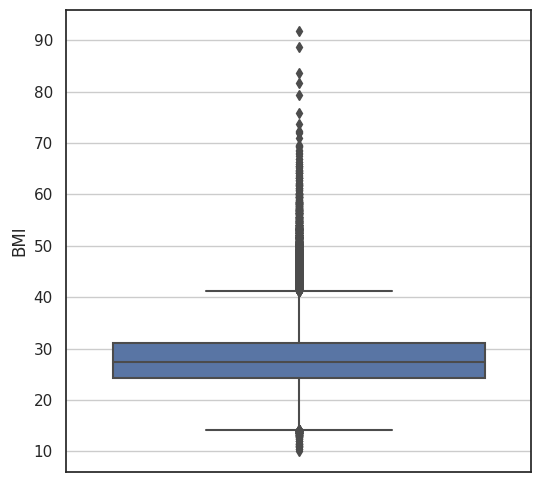

In [187]:
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy, y='BMI').yaxis.grid(True)

In [188]:
df = mustafaDataset_Actual_Copy.copy()
print(df.shape)

(51510, 9)


In [189]:
iqr = df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25)

# Calculate the lower and upper bounds
lower_bound = df['BMI'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['BMI'].quantile(0.75) + (1.5 * iqr)

# Drop the outliers
df = df[(df['BMI'] > lower_bound) & (df['BMI'] < upper_bound)]

# Print the new dataset
print(df)

       Gender  Age  HighBP    BMI  Smoker  HeartDisease  HbA1cLevel  \
0           0   13       0  25.19       2             1         6.6   
2           1    2       0  27.32       2             0         5.7   
3           0    4       0  23.45       0             0         5.0   
4           1   12       1  20.14       0             1         4.8   
5           0    1       0  27.32       2             0         6.6   
...       ...  ...     ...    ...     ...           ...         ...   
99992       0    2       0  34.34       2             0         6.5   
99993       0    5       0  40.69       2             0         3.5   
99997       1   10       0  27.83       1             0         5.7   
99998       0    1       0  35.42       2             0         4.0   
99999       0    8       0  22.43       0             0         6.6   

       BloodGlucoseLevel  Diabetes  
0                    140         0  
2                    158         0  
3                    155         0  

In [190]:
print(df.shape)

(49072, 9)


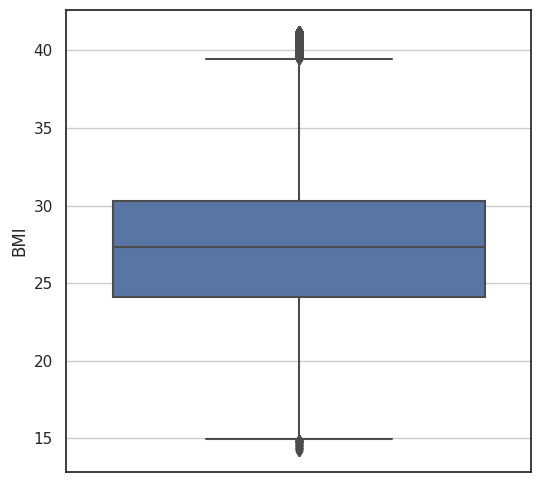

In [191]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, y='BMI').yaxis.grid(True)

In [192]:
mustafaDataset_Actual_Copy = df.copy()

In [193]:
mustafaDataset_Actual_Copy.describe()

,Gender,Age,HighBP,BMI,Smoker,HeartDisease,HbA1cLevel,BloodGlucoseLevel,Diabetes
count,49072.000000,49072.000000,49072.000000,49072.000000,49072.000000,49072.000000,49072.000000,49072.000000,49072.000000
mean,0.396886,5.892158,0.093291,27.478392,1.478053,0.042611,5.519555,135.782014,0.080351
std,0.489382,3.810256,0.290843,5.099068,0.774330,0.201980,1.067513,35.678955,0.271839
min,0.000000,0.000000,0.000000,14.190000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,0.000000,3.000000,0.000000,24.140000,1.000000,0.000000,4.800000,100.000000,0.000000
50%,0.000000,6.000000,0.000000,27.320000,2.000000,0.000000,5.800000,140.000000,0.000000
75%,1.000000,9.000000,0.000000,30.270000,2.000000,0.000000,6.200000,159.000000,0.000000
max,2.000000,13.000000,1.000000,41.250000,2.000000,1.000000,9.000000,240.000000,1.000000


In [194]:
mustafaDataset_Actual ['age'] = mustafaDataset_Actual ['age'].apply(categorizeAge)
mustafaDataset_Actual ['gender'] = LabelEncoder().fit_transform(mustafaDataset_Actual .gender)
mustafaDataset_Actual .rename(columns = {'gender':'Gender','age':'Age','hypertension':'HighBP','smoking_history':'Smoker',
                                             'bmi':'BMI','diabetes': 'Diabetes','heart_disease':'HeartDisease','HbA1c_level':'HbA1cLevel',
                                             'blood_glucose_level': 'BloodGlucoseLevel','smoking_history': 'Smoker'},inplace = True)

df1 = mustafaDataset_Actual.copy()

In [196]:
df1 = df1.drop(df1[(df1.Smoker != 'never') & (df1.Smoker != 'current') & (df1.Smoker != 'former')].index)
df1['Smoker'] = LabelEncoder().fit_transform(df1.Smoker)
df1 = df1[selectedFeatures]

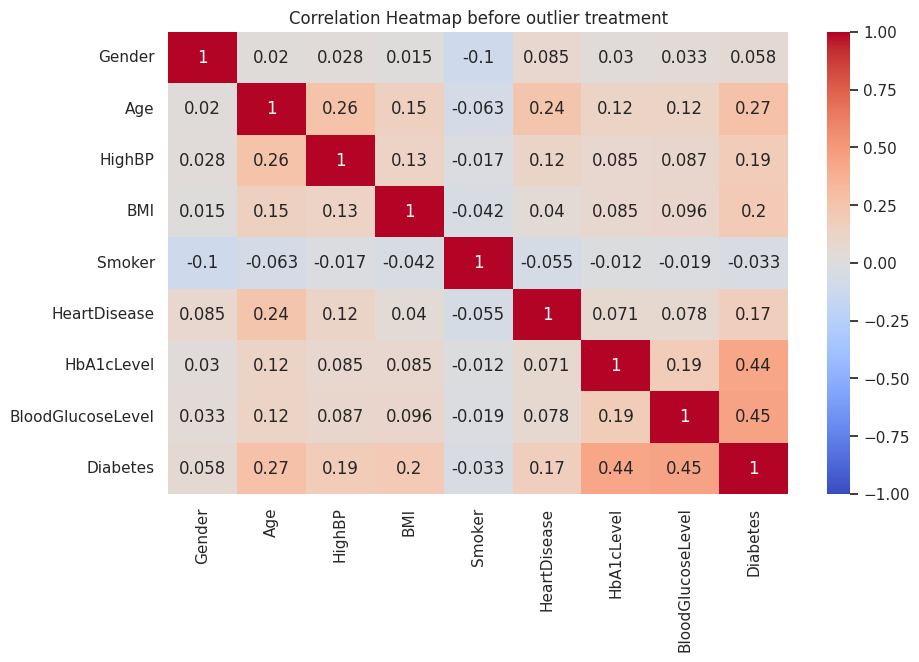

In [197]:
corr_matrix = df1.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

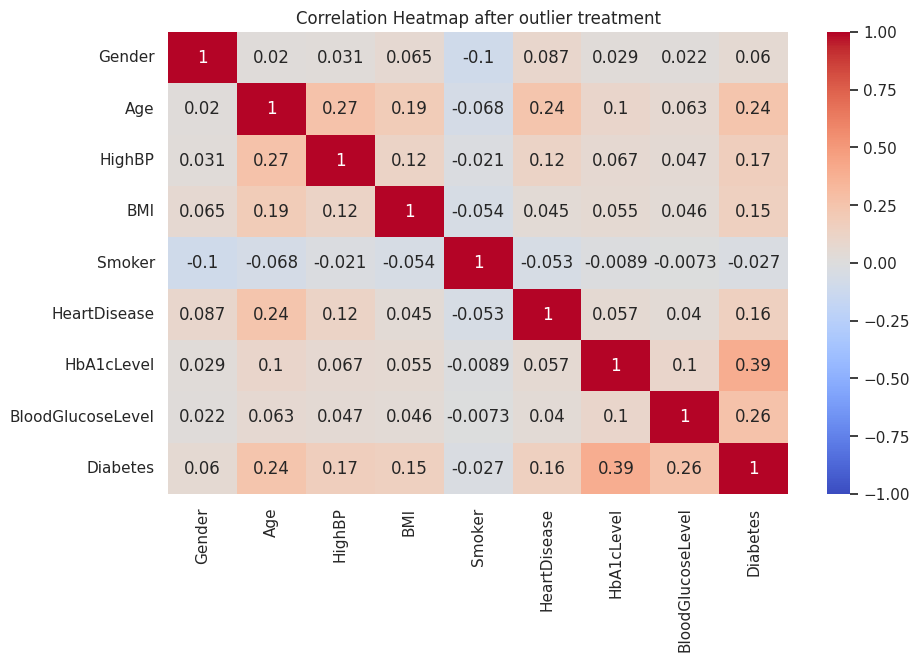

In [199]:
mustafaDataset_Actual_Copy = df.copy()
corr_matrix = mustafaDataset_Actual_Copy.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap after outlier treatment')
plt.show()

In [200]:
mustafaDataset_Actual_Copy.to_csv('FinalMustafaDataset.csv')